In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import scipy
import shap

import matplotlib as mpl
import matplotlib.pyplot as plt
# we are using the inline backend
%matplotlib inline

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
 
model = xgb.XGBRegressor(max_depth=3, n_estimators=250, colsample_bytree=0.75, seed=123)
model.fit(X_train, y_train)
 
y_pred_val = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [6]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [7]:
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head()

Shape: (480, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,-0.013718,0.021992,-0.259468,-0.030031,0.181853,-0.024694,0.044354,-0.020674,-0.194620,0.056604,-0.094130
1,0.046131,-0.081571,0.004048,0.032473,-0.048995,0.052277,-0.056473,-0.052451,-0.030901,0.030317,-0.073498
2,-0.043875,0.241336,0.011406,-0.023491,-0.219375,-0.004606,0.152081,0.017364,0.085902,0.172821,0.199850
3,0.018318,0.008411,-0.017687,0.006418,-0.026923,0.026082,-0.070868,0.020848,-0.045540,0.025835,-0.076349
4,0.091906,0.208147,0.009444,-0.007624,0.103892,0.003493,-0.010560,0.101461,0.028199,-0.354426,0.239907


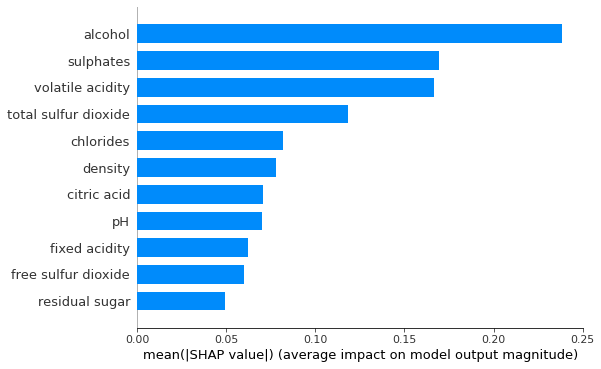

In [8]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

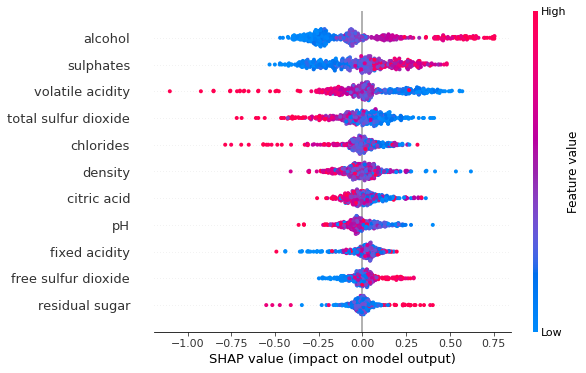

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.dependence_plot('alcohol', shap_values, X_test)

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])

In [ ]:
D = scipy.spatial.distance.pdist(X.fillna(X.mean()).T, metric="correlation")
cluster_matrix = scipy.cluster.hierarchy.complete(D)

In [ ]:
# plot the clustering
plt.figure(figsize=(15, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
scipy.cluster.hierarchy.dendrogram(
    cluster_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=X.columns
)
plt.show()